# Task- 3 : To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, we have to predict the optimum number of clusters and represent it visually.

## Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing the required libaries

In [96]:
!pip install plotly

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
%matplotlib inline

#  Reading the csv file:

In [98]:
import pandas as pd
iris_data=pd.read_csv("Iris.csv")

x=iris_data.iloc[:,[1,2,3,4]].values
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Finding the dimension of the dataset

In [99]:
iris_data.shape

(150, 6)

Finding if the data contains any null value or not

In [100]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [101]:
iris_data.dtypes  #checking the data type

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# We try to gain more information about the data¶
Checking all the statics of the data

## Explanatory Data Analysis(EDA):

In [104]:
import pandas_profiling # EDA testing(explanatory data analysis)
iris_data.profile_report()

In [105]:
iris_data = iris_data.drop(['Id'], axis=1) #Remove Id column
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
iris_data.describe() #to describe the overall summary of numerical measurements of the data entries.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# We convert the categorical features

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
iris_data['Species']=label_encode.fit_transform(iris_data['Species'])
print(iris_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


## We see there are 3 distinct Species so ideally we should have 3 clusters.

In [108]:
iris_data['Species'].unique() #to check unique entries in Species

array([0, 1, 2])

# Visualizing the Data¶

# Pairplot:
Pairplot function will create a grid of Axes such that each numeric variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.

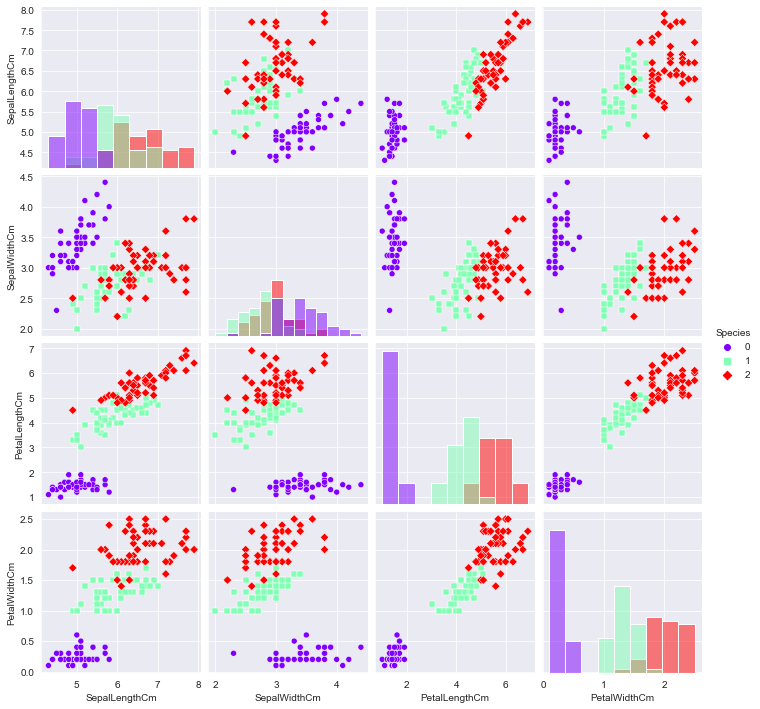

In [109]:
import seaborn as sns
sns.pairplot(data=iris_data, hue='Species',palette='rainbow',diag_kind='hist',markers=["o","s","D"]) #plotting pairplot

# Finding the relation between the features

# Heatmap:
A heat map uses a warm-to-cool color spectrum to show you which parts of a page receive the most attention.

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


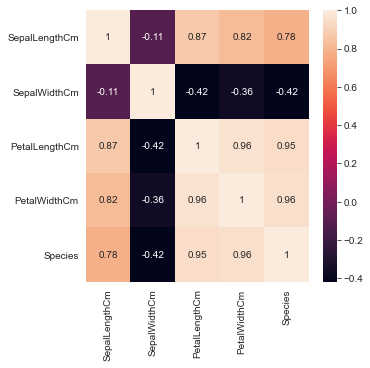

In [110]:
data_1=iris_data.iloc[:,1:-1]
correlation=iris_data.corr()
print(correlation)   # printing the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(correlation,annot=True)
plt.show()

# Scatter plot through FacetGrid:

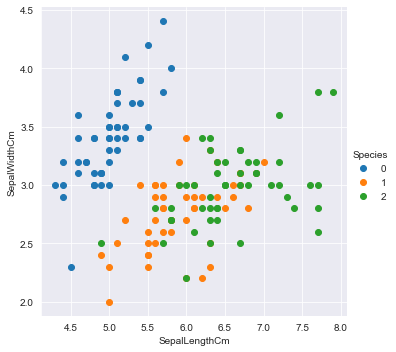

In [111]:
import matplotlib.pyplot as plt
sns.FacetGrid(iris_data, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Scatterplot:
Scatter plots are used to plot data points on a horizontal and a vertical axis to study how much one variable is affected by another.

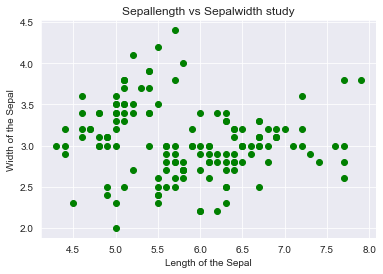

In [112]:
plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'],color="green")#plotting the given data to check if there is any relationship  between them.
plt.title('Sepallength vs Sepalwidth study')
plt.xlabel('Length of the Sepal')
plt.ylabel('Width of the Sepal')
plt.grid(True)
plt.show()

# Displot:
This plot helps to study the distribution of the underlying data variables Hours and Scores.

C:\Users\Shohini Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



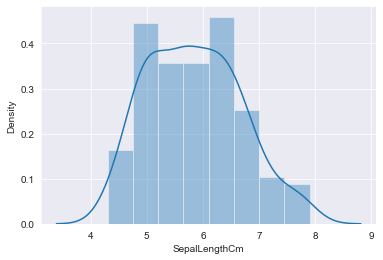

In [115]:
import seaborn as sns
sns.distplot(iris_data['SepalLengthCm'])#to check the distribution

C:\Users\Shohini Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



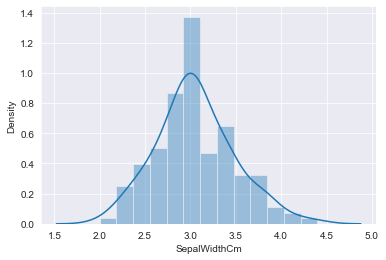

In [114]:
import seaborn as sns
sns.distplot(iris_data['SepalWidthCm'])#to check the distribution

# 3D Visualization of PetalLengthCm and PetalwidthCm and SepallengthCm

In [116]:
# import plotly.offline as pyo
# Set notebook mode to work in offline

import plotly_express as px
#3d plot size by SepalWidthCm
px.scatter_3d(df1, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

# 3D visualization of the dataset with respect to setosa,versicolor and virginica

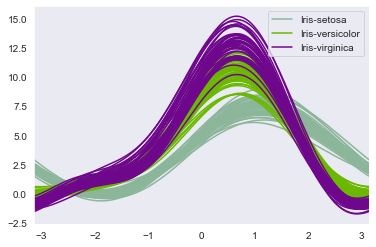

In [117]:
iris=pd.read_csv("Iris.csv")
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

# Preparing the Data
As, We would use K-means Clustering we would have to scale the data but here all the dependent features are of same unit

To Find the optimum number of cluser (K) we'll use:

# Elbow method

Here, we find the sum of squares within cluster (WCSS) for differnt number of cluster We choose the number where the WCSS stops declining drastically

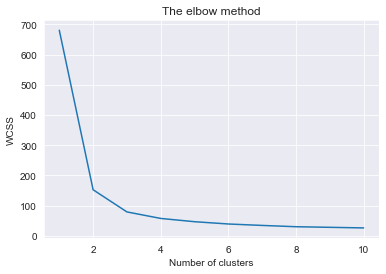

In [118]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)                           
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'  kngulo bolo`to class a dakchilo
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Let us visualize to understand better

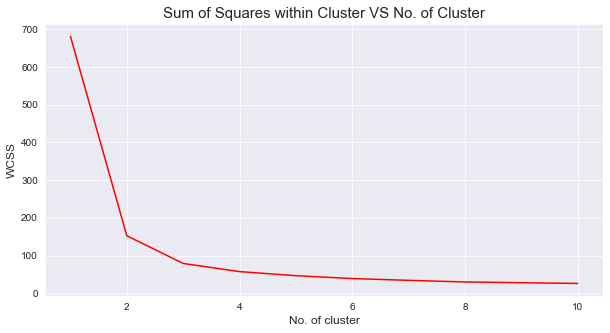

In [119]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='red')
plt.title('Sum of Squares within Cluster VS No. of Cluster',size=15)
plt.xlabel('No. of cluster',size=12)
plt.ylabel('WCSS',size=12)
plt.show()

Here, we see the linegraph stops decreasing significantly after 3. It's a gradual decrease after that. So, we choose no. of cluster = 3

Applying K-means classifier to the Model

In [121]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 100, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Comparing the clusters we have made with the species

In [122]:
df1=iris_data.copy()
df1['Cluster']=classifier
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# Results:

# Visualizing the Clusters

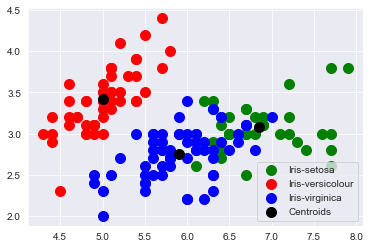

In [123]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

For the features Sepal length and Petal length

In [124]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
classifier = kmeans.fit_predict(x)

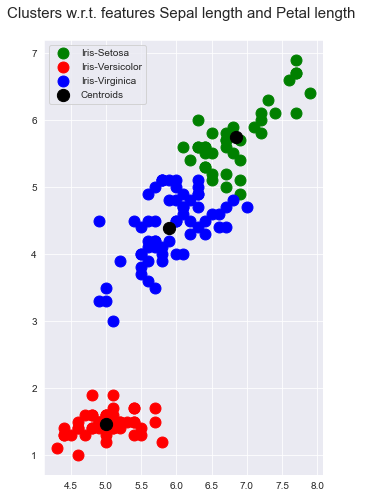

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,8))
plt.title('Clusters w.r.t. features Sepal length and Petal length \n',size=15)

plt.scatter(x[classifier==0,0],x[classifier==0,2],s=120,c='green',label='Iris-Setosa')
plt.scatter(x[classifier==1,0],x[classifier==1,2],s=120,c='red',label='Iris-Versicolor')
plt.scatter(x[classifier==2,0],x[classifier==2,2],s=120,c='blue',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=150,c='black',label='Centroids')

plt.legend()
plt.show()

For the features Sepal width and Petal width

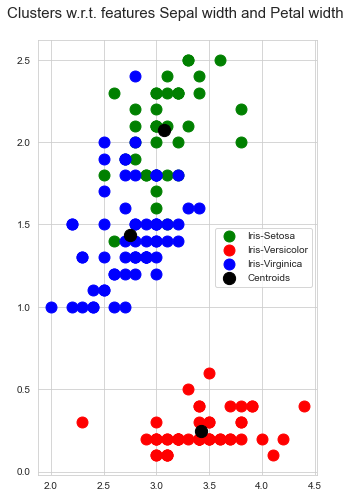

In [125]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,8))
plt.title('Clusters w.r.t. features Sepal width and Petal width \n',size=15)

plt.scatter(x[classifier==0,1],x[classifier==0,3],s=120,c='green',label='Iris-Setosa')
plt.scatter(x[classifier==1,1],x[classifier==1,3],s=120,c='red',label='Iris-Versicolor')
plt.scatter(x[classifier==2,1],x[classifier==2,3],s=120,c='blue',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],s=150,c='black',label='Centroids')

plt.legend()
plt.show()

For the features Sepal length and Sepal width

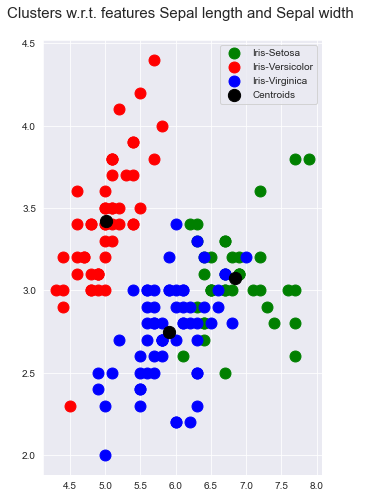

In [126]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,8))
plt.title('Clusters w.r.t. features Sepal length and Sepal width \n',size=15)

plt.scatter(x[classifier==0,0],x[classifier==0,1],s=120,c='green',label='Iris-Setosa')
plt.scatter(x[classifier==1,0],x[classifier==1,1],s=120,c='red',label='Iris-Versicolor')
plt.scatter(x[classifier==2,0],x[classifier==2,1],s=120,c='blue',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='black',label='Centroids')

plt.legend()
plt.show()

# Made by Sohini Roy